In [1]:
# %load fonts.py
#!/usr/bin/env python

# In[ ]:


# matplotlib 한글 폰트 문제 해결
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import platform 

if platform.system() == 'Darwin':   # Mac 환경 폰트 지정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')
    
plt.rc('axes', unicode_minus=False)



In [2]:
import seaborn as sns

In [3]:
titanic = sns.load_dataset('titanic')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


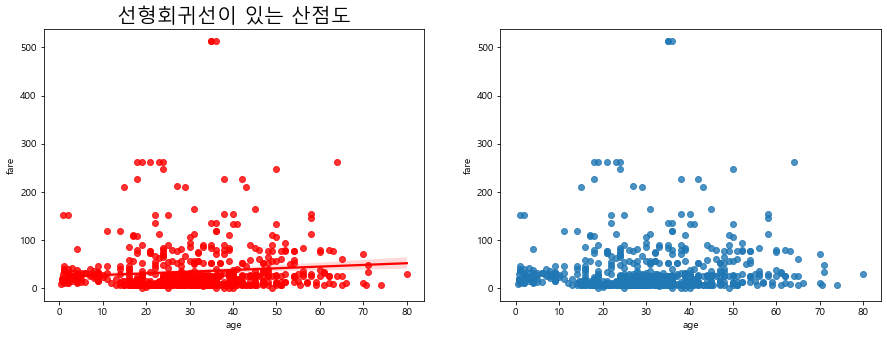

In [4]:
# seaborn을 활용하여 회귀선이 있는 산점도 그리기
fig = plt.figure(figsize = (15,5))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 선형 회귀선 표시
sns.regplot(x = 'age',  # x축 변수
            y = 'fare', # y축 변수
            data = titanic,  # 데이터
            ax = ax1,
            color = 'red',
            marker = 'o')

sns.regplot(x = 'age',  # x축 변수
            y = 'fare', # y축 변수
            data = titanic,  # 데이터
            ax = ax2,
            fit_reg = False)

ax1.set_title("선형회귀선이 있는 산점도", size = 20)
plt.show()

C:\Users\HPE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


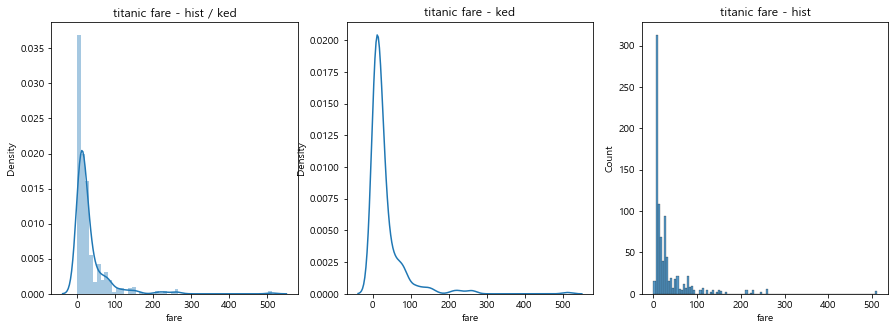

In [5]:
# 히스토그램 / 커널 밀도 함수
fig = plt.figure(figsize = (15,5))

ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# distplot
sns.distplot(titanic['fare'], ax = ax1)

# kdeplot
sns.kdeplot(x = 'fare', data = titanic, ax = ax2)

# histplot
sns.histplot(x ='fare', data = titanic, ax = ax3)

ax1.set_title('titanic fare - hist / ked')
ax2.set_title('titanic fare - ked')
ax3.set_title('titanic fare - hist')

plt.show()

<AxesSubplot:xlabel='class', ylabel='sex'>

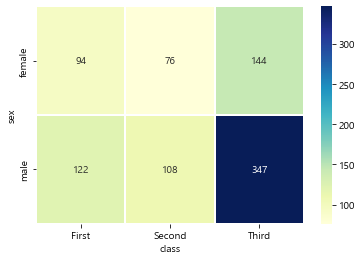

In [6]:
# 히트맵
table = titanic.pivot_table(index = ['sex'], columns = ['class'], aggfunc = 'size')

# 히트맵 그리기
sns.heatmap(table,
            annot = True, fmt = 'd', # 그룹함수의 결과를 정수로 표시
            cmap = 'YlGnBu', # 컬러 맵
            linewidth = .1, # 구분선
            cbar = True      # 컬러바 표시 여부
           )

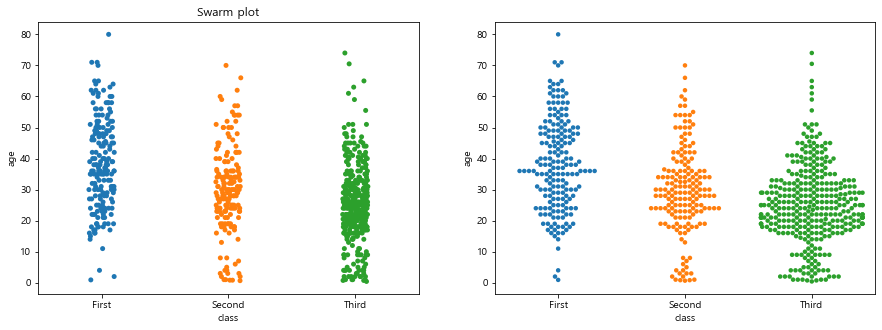

In [7]:
# 범주형 데이터 산점도
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 이산형 변수의 분포, 데이터 분산 미고려(중복 표시함)
sns.stripplot(x='class',
             y = 'age',
             data = titanic,
             ax = ax1
             )
sns.swarmplot(x='class',
             y = 'age',
             data = titanic,
             ax = ax2,
              size = 4.5
             )

ax1.set_title('Strip plot')
ax1.set_title('Swarm plot')

plt.show()

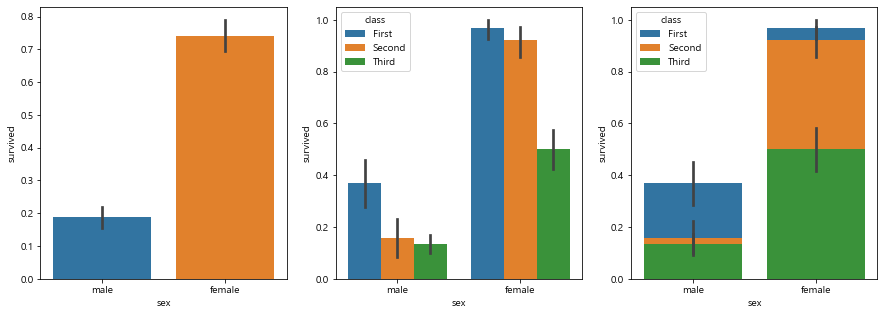

In [8]:
# 막대 그래프 : barplot()
fig = plt.figure(figsize = (15,5))

ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.barplot(x = 'sex', y = 'survived', data = titanic, ax = ax1)
sns.barplot(x = 'sex', y = 'survived', hue = 'class', data = titanic, ax = ax2)
sns.barplot(x = 'sex', y = 'survived', hue = 'class', dodge = False,
            data = titanic, ax = ax3)

plt.show()

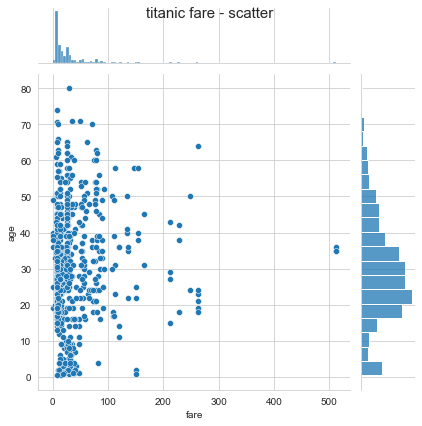

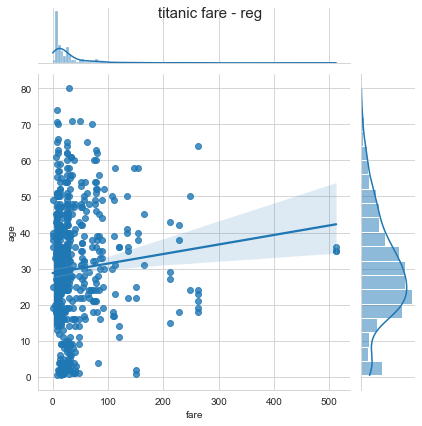

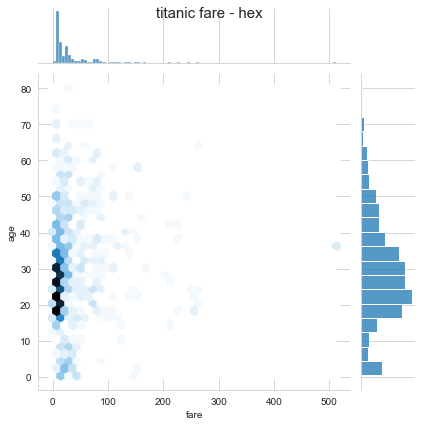

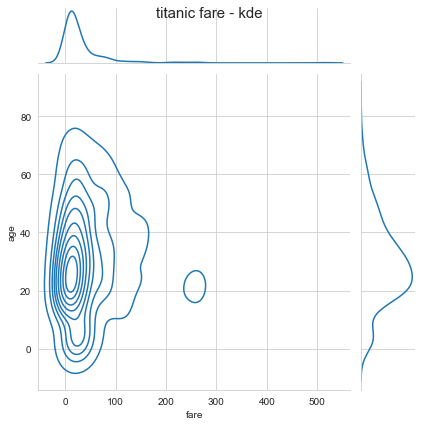

In [9]:
# 조인트 그래프 : jointplot()
# 산점도를 기본, x-y축에 변수에대한 히스토그램
sns.set_style('whitegrid')
j1 = sns.jointplot(x = 'fare', y='age', data = titanic)
j2 = sns.jointplot(x = 'fare', y='age', data = titanic, kind = 'reg')
j3 = sns.jointplot(x = 'fare', y='age', data = titanic, kind = 'hex')
j4 = sns.jointplot(x = 'fare', y='age', data = titanic, kind = 'kde')

j1.fig.suptitle('titanic fare - scatter', size = 15)
j2.fig.suptitle('titanic fare - reg', size = 15)
j3.fig.suptitle('titanic fare - hex', size = 15)
j4.fig.suptitle('titanic fare - kde', size = 15)

plt.show()

## Folium 라이브러리

In [10]:
import folium

seoul_map = folium.Map(location = [37.55, 126.98], zoom_start = 12)

# 지도를 html 파일로 저장
seoul_map.save('./dataset/서울지도.html')

In [11]:
seoul_map1 = folium.Map(location = [37.55, 126.98], zoom_start = 12,
                       tiles = 'stamen Terrain')
seoul_map2 = folium.Map(location = [37.55, 126.98], zoom_start = 12,
                       tiles = 'stamen Toner')

seoul_map1.save('./dataset/서울지도1.html')
seoul_map2.save('./dataset/서울지도2.html')

In [12]:
# 지도에 마커 표시하기
# 위도, 경도로 지도를 생성
# 추가작업 진행

df = pd.read_excel("./dataset/서울지역 대학교 위치.xlsx")
df = df.rename(columns={'Unnamed: 0':'name'})
df = df.set_index('name')
# 대학교 위치정보를 marker로 표시
for name, lat, lng in zip(df.index, df.위도, df.경도):
    folium.Marker([lat, lng], popup = name).add_to(seoul_map)
    
seoul_map.save('./dataset/서울 대학교 지도.html')

In [13]:
# 지도 영역에 단계구분도 표시 : Choropleth()
import json

# 경기도 인구변화 데이터를 불러와서 데이터프레임으로 변환
file_path = './dataset/경기도인구데이터.xlsx'
df = pd.read_excel(file_path, index_col='구분', engine= 'openpyxl')
df.columns = df.columns.map(str)

# 경기도 시군구 경계 정보를 가진 geo-json 파일 불러오기
geo_path = './dataset/경기도행정구역경계.json'
try:
    geo_data = json.load(open(geo_path, encoding='utf-8'))
except:
    geo_data = json.load(open(geo_path, encoding='utf-8-sig'))

# 경기도 지도 만들기
g_map = folium.Map(location=[37.5502,126.982], 
                   tiles='Stamen Terrain', zoom_start=9)

# 출력할 연도 선택 (2007 ~ 2017년 중에서 선택)
year = '2017'

# Choropleth 클래스로 단계구분도 표시하기
folium.Choropleth(geo_data=geo_data,    # 지도 경계
                 data = df[year],      # 표시하려는 데이터
                 columns = [df.index, df[year]],  # 열 지정
                 fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.3,
                 threshold_scale=[10000, 100000, 300000, 500000, 700000],
                 key_on='feature.properties.name',
                 ).add_to(g_map)

# 지도를 HTML 파일로 저장하기
g_map.save('./gyonggipopulation' + year + '.html')

## 데이터 사전처리

In [14]:
# 누락 데이터 처리
# --누락 데이터확인
#   - count()
#   - value_counts()
#   - isnull() -> isnull.count()

In [15]:
df = sns.load_dataset('titanic')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [16]:
# deck 칼럼의 값들의 개수 : value_counts()
df['deck'].value_counts(dropna=False)

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64

In [17]:
# isnull() : 누락 데이터 개수 확인
print(df.head().isnull().sum(axis = 0))
print()
print(df.isnull().sum(axis = 0))


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           3
embark_town    0
alive          0
alone          0
dtype: int64

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [18]:
# 누락 데이터가 n(500)개 이상인 경우 칼럼을 삭제
df1 = df.dropna(axis = 1)    # none이있는 모든 칼럼 삭제

df_1 = df.dropna(axis = 1, thresh = 500)  # none이 500개 이상있는 모든 칼럼 삭제
df_2 = df.dropna(subset = ['deck','age'], how = 'any', axis = 0)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 1 to 889
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     184 non-null    int64   
 1   pclass       184 non-null    int64   
 2   sex          184 non-null    object  
 3   age          184 non-null    float64 
 4   sibsp        184 non-null    int64   
 5   parch        184 non-null    int64   
 6   fare         184 non-null    float64 
 7   embarked     182 non-null    object  
 8   class        184 non-null    category
 9   who          184 non-null    object  
 10  adult_male   184 non-null    bool    
 11  deck         184 non-null    category
 12  embark_town  182 non-null    object  
 13  alive        184 non-null    object  
 14  alone        184 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 18.4+ KB


In [19]:
# 누락데이터 치환 : df.fillna(method = 'ffill')
#                                      'bfill'
#                                      '값'
df_f = df.copy()
print(df_f.age.isnull().value_counts())
df_f['age'] = df_f['age'].fillna(df['age'].mean(axis = 0))
print()
print(df_f.age.isnull().value_counts())

# 가장 빈번하게 나오는값으로 치환

# 가장 큰값으로 치환, 가장 작은 값으로 치환

# 이전값으로 치환, 이후 나오는 값으로 치환 fillna(method='ffill' or 'bfill')

False    714
True     177
Name: age, dtype: int64

False    891
Name: age, dtype: int64


In [20]:
print(df['embark_town'][825:830])
# embark_town 의 none -> 이전값으로 대체
df_2 = df.copy()
df_2['embark_town'].fillna(method='ffill', inplace = True)
print(df_2['embark_town'][825:830])

# 가장 빈번하게 나오는값으로 치환
most_freq = df['embark_town'].value_counts(dropna = True).idxmax()
df_2 = df.copy()
df_2['embark_town'].fillna(most_freq, inplace = True)
df_2.embark_town[825:830]

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829            NaN
Name: embark_town, dtype: object
825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829     Queenstown
Name: embark_town, dtype: object


825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829    Southampton
Name: embark_town, dtype: object

In [21]:
# 이후 나오는 값으로 치환
print(df['embark_town'][825:831])
df_2 = df.copy()
df_2['embark_town'].fillna(method='bfill', inplace = True)
print(df_2['embark_town'][825:831])

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829            NaN
830      Cherbourg
Name: embark_town, dtype: object
825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829      Cherbourg
830      Cherbourg
Name: embark_town, dtype: object


In [22]:
# 누락 데이터가 nan이 아니라 특수문자인 경우
# 특수문자를 nan으로 치환 후 nan처리
df = pd.read_csv('./dataset/auto-mpg.csv', header = None)
df

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [23]:
df.columns =  ['mpg','cylinders','displacement','horsepower','weight',
             'acceleration','model year','origin','name']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [24]:
# df['horsepower'].astype(float)  # 문자가 포함되어있어서 에러
df['horsepower'].unique()

# 1. '?'를 nan으로 치환
df['horsepower'].replace('?', np.nan, inplace = True)

# 2. horsepower의 값이 nan이면 해당 행을 삭제
df.dropna(subset='horsepower', axis = 0, inplace = True)

df['horsepower'] = df['horsepower'].astype(float)
df['horsepower'].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
       100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,  65.,
        69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137., 158.,
       167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,  78.,
        52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,  81.,
        79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,  48.,
        66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62., 132.,
        84.,  64.,  74., 116.,  82.])

In [25]:
# 중복 데이터 처리
df = pd.DataFrame({'c1':['a', 'a', 'b', 'a', 'b'],
                  'c2':[1, 1, 1, 2, 2],
                  'c3':[1, 1, 2, 2, 2]})
df.duplicated()

0    False
1     True
2    False
3    False
4    False
dtype: bool

In [26]:
# 'c2' 칼럼에 대해서 중복체크
df['c2'].duplicated()

# 중복 데이터를 제거 : drop_duplicates()
print(df)
print()
df2 = df.drop_duplicates()
print(df2)
print()
df3 = df.drop_duplicates(subset=['c2','c3'])
print(df3)
print()
df4 = df.drop_duplicates(subset=['c1'])
print(df4)

  c1  c2  c3
0  a   1   1
1  a   1   1
2  b   1   2
3  a   2   2
4  b   2   2

  c1  c2  c3
0  a   1   1
2  b   1   2
3  a   2   2
4  b   2   2

  c1  c2  c3
0  a   1   1
2  b   1   2
3  a   2   2

  c1  c2  c3
0  a   1   1
2  b   1   2


In [27]:
# 데이터 정제
# 1. 누락 데이터 처리 -> Nan, 특수문자
#     dropna(subset=, thresh, axis)
#     fillna(값, method = 'ffill' or 'bfill')
#
# 2. 중복 데이터 처리
#     drop_duplicates(subset=[])
#
# 3. 데이터 표준화
#     1) 단위 환산
#     2) 자료형 변환
#
# 4. 범주형 데이터 처리
#     카테고리형으로 변환
#     구간으로 데이터를 나누어서 처리
#
# 5. 더미 변수
#     카테고리 데이터인 경우
#     0과 1로 값을 변환 시킴
#
# 6. train과 test 분리 -> 모델 학습

In [28]:
# 단위 환산
df = pd.read_csv('./dataset/auto-mpg.csv', header = None)
df.columns =  ['mpg','cylinders','displacement','horsepower','weight',
             'acceleration','model year','origin','name']
df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite


In [29]:
# mpg(mile per gallon) -> kpl
df['kpl'] = ((df['mpg']*1.609)/3.78).round(2)
df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,kpl
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,7.66
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,6.38
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,7.66


In [30]:
# 자료형 변환
# df.dtypes
# df['horsepower'].dtype -> object 를 float로 형변환
df['horsepower'].replace('?', np.nan, inplace = True)
df['horsepower'] = df['horsepower'].astype('float')

df['horsepower'].dtype

dtype('float64')

In [31]:
# origin 컬럼의 정보 분석
print(df['origin'].dtype)
print(df['origin'].unique())

# int 형을 범주형으로 변환
df['origin'] = df['origin'].astype('category')
print(df['origin'].unique())

# 카테고리의 값을 문자형으로 변경 1 -> USA, 2 -> EU, 3 -> jpn
df['origin'].replace({1:'USA', 2:'EU', 3:'JPN'}, inplace = True)
print(df['origin'].unique())

int64
[1 3 2]
[1, 3, 2]
Categories (3, int64): [1, 2, 3]
['USA', 'JPN', 'EU']
Categories (3, object): ['USA', 'EU', 'JPN']


In [32]:
# 범주형 자료의 데이터 타입을 stf로 변경 가능
df['origin'] = df['origin'].astype('str')
print(df['origin'].dtype)

object


In [33]:
print(df['origin'].sample(3))

338    USA
232    USA
322    JPN
Name: origin, dtype: object


In [34]:
# model_year 컬럼 분석 -> 카테고리형으로 변경
df['model year'].value_counts().info()
df['model year'] = df['model year'].astype('category')
df['model year'].dtypes

<class 'pandas.core.series.Series'>
Int64Index: 13 entries, 73 to 74
Series name: model year
Non-Null Count  Dtype
--------------  -----
13 non-null     int64
dtypes: int64(1)
memory usage: 208.0 bytes


CategoricalDtype(categories=[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], ordered=False)

In [35]:
# 문자 또는 숫자를 카테고리형으로 변경
# 원-핫 인코딩을 통해 자료 변형
# 연속형 데이터를 범주형으로 변경
# 1. horsepower 컬럼을 3구간으로 나누어서 범주형으로 나눔
# 2. 각 구간별 경계선의 값이 필요 -> np.histogram(컬럼명, bins = 구간수)
#    각 구간별 경계값과 구간에 소속된 데이터 개수를 튜플로 반환
df['horsepower'].isnull().value_counts()
df.dropna(subset = ['horsepower'], axis = 0, inplace = True)
count, bin_dividers = np.histogram(df['horsepower'], bins = 3)

In [36]:
print(count)
print(bin_dividers)

bin_labels = ['저출력', '보통출력', '고출력']

# cut() 함수를 사용하여 각 값들을 bin에 할당
df['hp_bin'] = pd.cut(x=df['horsepower'],
                      bins = bin_dividers,
                      labels = bin_labels,
                     include_lowest = True)
df[['horsepower', 'hp_bin']].head(15)

[257 103  32]
[ 46.         107.33333333 168.66666667 230.        ]


,horsepower,hp_bin
0,130.0,보통출력
1,165.0,보통출력
2,150.0,보통출력
3,150.0,보통출력
4,140.0,보통출력
5,198.0,고출력
6,220.0,고출력
7,215.0,고출력
8,225.0,고출력
9,190.0,고출력


In [37]:
# 더미변수
pd.get_dummies(df['hp_bin']).head(15)

,저출력,보통출력,고출력
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,0,1


In [38]:
pd.get_dummies(df['origin']).head(15)

,EU,JPN,USA
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,0,1


In [40]:
titanic['alive'].sample(10) # object를 카테고리로 
titanic['alive'] = titanic['alive'].astype('category')
alive_dummy = pd.get_dummies(titanic['alive'], prefix = 'alive', drop_first = True)
titanic = pd.concat([titanic, alive_dummy], axis = 1)
titanic['alive_yes'].dtypes

alive_yes    uint8
alive_yes    uint8
dtype: object